# Object Detection and Classification with YOLO_v.3

In [44]:
import numpy as np
import time
import cv2
import os

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

### Download COCO Labels

In [46]:
!wget https://www.dropbox.com/s/h5piyms4hj3h9sz/coco.names

--2021-05-15 16:10:48--  https://www.dropbox.com/s/h5piyms4hj3h9sz/coco.names
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/h5piyms4hj3h9sz/coco.names [following]
--2021-05-15 16:10:48--  https://www.dropbox.com/s/raw/h5piyms4hj3h9sz/coco.names
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9ef4dfb0c019b3e16b0573aaa1.dl.dropboxusercontent.com/cd/0/inline/BOjkhRThXXaRLPYW6PUldseJS2nP51jIR6LFTfeqim_A9tY4-JFOl-W8JAVzNjmsyFx5JwYao_gAYRcPnxPWvH8SyYXjyNWqprb4eDkC9kUiuCqs7_513De8c3GNRXI5KRAkk5LH39sO72SI5m2MICxv/file# [following]
--2021-05-15 16:10:48--  https://uc9ef4dfb0c019b3e16b0573aaa1.dl.dropboxusercontent.com/cd/0/inline/BOjkhRThXXaRLPYW6PUldseJS2nP51jIR6LFTfeqim_A9tY4-JFOl-W8JAVzNjmsyFx5JwYao_gAYRcPnxPWvH8SyYXjyNWq

## Labels from COCO Dataset

In [47]:
labelsPath = r'coco.names'
LABELS = open(labelsPath).read().strip().split("\n")

In [48]:
len(LABELS)

80

In [49]:
LABELS

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [50]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

In [51]:
COLORS

array([[102, 220, 225],
       [ 95, 179,  61],
       [234, 203,  92],
       [  3,  98, 243],
       [ 14, 149, 245],
       [ 46, 106, 244],
       [ 99, 187,  71],
       [212, 153, 199],
       [188, 174,  65],
       [153,  20,  44],
       [203, 152, 102],
       [214, 240,  39],
       [121,  24,  34],
       [114, 210,  65],
       [239,  39, 214],
       [244, 151,  25],
       [ 74, 145, 222],
       [ 14, 202,  85],
       [145, 117,  87],
       [184, 189, 221],
       [116, 237, 109],
       [ 85,  99, 172],
       [226, 153, 103],
       [235, 146,  36],
       [151,  62,  68],
       [181, 130, 160],
       [160, 166, 149],
       [  6,  69,   5],
       [ 52, 253, 112],
       [ 14,   1,   3],
       [ 76, 248,  87],
       [233, 212, 184],
       [235, 245,  26],
       [213, 157, 253],
       [ 68, 240,  37],
       [219,  91,  54],
       [129,   9,  51],
       [  0, 191,  20],
       [140,  46, 187],
       [147,   1, 254],
       [ 20, 153, 243],
       [ 46, 160

## Download Pre-trained Yolo_v3 Model and Weights

In [52]:
!wget https://www.dropbox.com/s/xhi3lh1rvy7celd/yolov3.weights

--2021-05-15 16:10:48--  https://www.dropbox.com/s/xhi3lh1rvy7celd/yolov3.weights
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xhi3lh1rvy7celd/yolov3.weights [following]
--2021-05-15 16:10:48--  https://www.dropbox.com/s/raw/xhi3lh1rvy7celd/yolov3.weights
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd32d9f514571cb4782c673ebe8.dl.dropboxusercontent.com/cd/0/inline/BOjdqCcg-GJp5NBqu1OdZUvyGyiaCzmdYAE58l06dH2WGRnSkpOsdM1d06AH54BDICjyVnnmq6DKHG-YreAMz3CDn0DhcW1qHfr_l07GPpaLxE7HxK4YIvgbXMatMEKouzMTznj_oLHOXWdlRzu8fP1Z/file# [following]
--2021-05-15 16:10:49--  https://ucd32d9f514571cb4782c673ebe8.dl.dropboxusercontent.com/cd/0/inline/BOjdqCcg-GJp5NBqu1OdZUvyGyiaCzmdYAE58l06dH2WGRnSkpOsdM1d06AH54BDICjyVnnmq6DKHG-YreAM

In [53]:
!wget https://www.dropbox.com/s/lb84ueim858rn6v/yolov3.cfg

--2021-05-15 16:10:53--  https://www.dropbox.com/s/lb84ueim858rn6v/yolov3.cfg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lb84ueim858rn6v/yolov3.cfg [following]
--2021-05-15 16:10:53--  https://www.dropbox.com/s/raw/lb84ueim858rn6v/yolov3.cfg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc1eea5d0d74d73b66c74fa141a.dl.dropboxusercontent.com/cd/0/inline/BOhJ0P37RytnVQbA0kbZoSZYx_BDwCILT38-3B4YFHDa88ZtQsz4l_0PXq-TdXBTSgs0L2zezlK2m48KKpEubqo0SiLTB7Ob8bftDSoI-hmce-Z_xexOXJAkNOeAA2lEN5WnvDfo4_UCaPXaIGjopshp/file# [following]
--2021-05-15 16:10:53--  https://ucc1eea5d0d74d73b66c74fa141a.dl.dropboxusercontent.com/cd/0/inline/BOhJ0P37RytnVQbA0kbZoSZYx_BDwCILT38-3B4YFHDa88ZtQsz4l_0PXq-TdXBTSgs0L2zezlK2m48KKpEubqo0SiLTB7Ob

In [54]:
weightsPath = 'yolov3.weights'
configPath = 'yolov3.cfg'

### Initialize the Yolo Model

In [55]:
yolo = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

### Read a Sample Image

In [56]:
!wget https://miro.medium.com/max/872/1*EYFejGUjvjPcc4PZTwoufw.jpeg -O sample.jpg

--2021-05-15 16:10:54--  https://miro.medium.com/max/872/1*EYFejGUjvjPcc4PZTwoufw.jpeg
Resolving miro.medium.com (miro.medium.com)... 162.159.152.4, 162.159.153.4, 2606:4700:7::a29f:9904, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.152.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160514 (157K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>] 156.75K  --.-KB/s    in 0.03s   

2021-05-15 16:10:54 (5.42 MB/s) - ‘sample.jpg’ saved [160514/160514]



In [57]:
image = cv2.imread('sample.jpg')

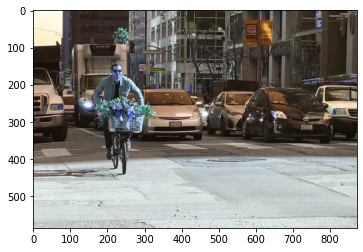

In [58]:
plt.imshow(image)
plt.show()

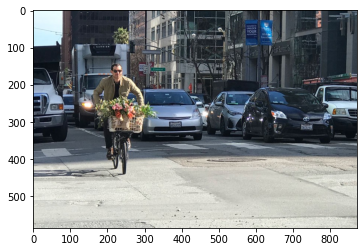

In [59]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(image)
plt.show()

In [60]:
(H, W) = image.shape[:2]

In [61]:
H, W

(586, 872)

### YOLOv3 Output Layers

YOLOv3 has 3 output layers (82, 94 and 106) as the figure shows.

getLayerNames(): Get the name of all layers of the network.

getUnconnectedOutLayers(): Get the index of the output layers.

These two functions are used for getting the output layers (82,94,106).

In [62]:
ln = yolo.getLayerNames()
print(ln)

['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37', 'conv_38', 'bn_38', 're

In [63]:
ln = [ln[i[0] - 1] for i in yolo.getUnconnectedOutLayers()]
print(ln)

['yolo_82', 'yolo_94', 'yolo_106']


### Preprocess the Image

In [64]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)

### Pass the Image through YOLOv3 and get the Output

In [65]:
# Set the input as the pre-processed image
yolo.setInput(blob)

# Pass the image through YOLOv3
layerOutputs = yolo.forward(ln)


In [66]:
len(layerOutputs)

3

In [67]:
layerOutputs[0].shape

(507, 85)

In [68]:
layerOutputs[1].shape

(2028, 85)

In [69]:
layerOutputs[2].shape

(8112, 85)

## Detect All the Bounding Boxes with Respective Class Scores

In [70]:
boxes = []
confidences = []
classIDs = []

In [71]:
for output in layerOutputs:
	# Loop over each of the detections
	for detection in output:
		# Extract the class ID and confidence (i.e., probability) of the current object detection
		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]

		# Filter out weak predictions by ensuring the detected probability is greater than the minimum probability
		if confidence > 0.5:
			# Scale the bounding box coordinates back relative to the size of the image, keeping in mind that YOLO actually
			# returns the center (x,y)-coordinates of the bounding box followed by the boxes' width and height
			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")

			# Use the center (x, y)-coordinates to derive the top-left corner of the bounding box
			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))

			# Update our list of bounding box coordinates, confidences and class IDs
			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
			classIDs.append(classID)

## Non Maxima Suppression

In [72]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

## Plot the Bounding Boxes and the Labels

In [73]:
if len(idxs) > 0:
	# Loop over the indexes we are keeping
	for i in idxs.flatten():
		# Extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])

		# Draw a bounding box rectangle and label on the image
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)

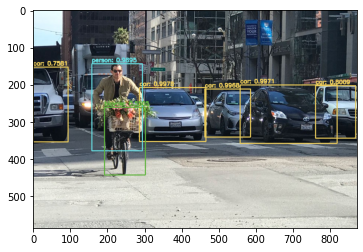

In [74]:
plt.imshow(image)

## Save the output as an image

In [75]:
cv2.imwrite('yolo_result.jpg', image)

True